# Flare Peak Detection Machine Learning Model
This file will contain our data preprocessing, machine learning model set up, and model testing to detect flare peaks. 
 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Most Up To Date: 
Under this section you'll find the most up to date model.

In [24]:
def create_CNN():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Conv1D(16, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=7))
    model.add(Dropout(0.1))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

CNN_model = create_CNN()
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 101, 128)          33792     
 al)                                                             
                                                                 
 conv1d (Conv1D)             (None, 100, 16)           4112      
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 16)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            3136      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)            

Previous Model: 

In [ ]:
"""# LSTM model creation (LSTM1)
def create_LSTM1():
  tf.random.set_seed(1)
  model = Sequential()
  model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
  return model

LSTM1_model = create_LSTM1()
LSTM1_model.summary()"""

### Data: Random Shuffle 
In this approach, 

In [10]:
# path = "../data/sliding_wide_100.csv"
path = "../data/wide_100_timein.csv"

full_set = pd.read_csv(path, index_col='time')
full_set.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Label
time,,,,,,,,,,,,,,,,,,,,,
2018-01-04 16:14:00,5.149268e-09,2.713372e-09,2.062562e-09,1.878039e-09,2.853294e-09,2.884146e-09,2.581892e-09,2.362232e-09,2.832257e-09,4.041982e-09,...,3.647174e-09,3.914213e-09,1.562427e-09,2.639643e-09,2.576929e-09,2.822219e-09,4.070104e-09,3.628872e-09,3.802066e-09,0
2018-01-03 20:35:00,2.279154e-09,3.845985e-09,1.000000e-09,1.000000e-09,2.312011e-09,1.000000e-09,2.576641e-09,1.412642e-09,1.713135e-09,2.936919e-09,...,3.263373e-09,3.647482e-09,2.107806e-09,2.802839e-09,3.163351e-09,2.691775e-09,2.131290e-09,2.425455e-09,2.683538e-09,0
2018-01-05 17:41:00,1.349381e-09,1.000000e-09,1.000000e-09,1.477174e-09,2.204487e-09,2.554508e-09,2.468002e-09,2.292788e-09,2.380516e-09,2.542112e-09,...,3.249232e-09,3.088156e-09,3.383143e-09,1.904150e-09,2.159639e-09,3.376447e-09,4.184607e-09,1.928010e-09,1.231803e-09,0
2018-01-08 09:52:00,6.612365e-09,7.214910e-09,5.770664e-09,8.107215e-09,8.031316e-09,8.750630e-09,9.141085e-09,8.776988e-09,8.462333e-09,8.070968e-09,...,7.876035e-09,6.990665e-09,6.763403e-09,4.998703e-09,5.717303e-09,6.872478e-09,7.336201e-09,9.348832e-09,7.306886e-09,0
2018-01-06 05:53:00,4.175134e-09,4.754023e-09,5.727439e-09,4.476072e-09,4.637268e-09,6.822878e-09,5.989311e-09,5.618509e-09,5.417833e-09,6.231001e-09,...,4.621428e-09,3.537122e-09,5.014333e-09,3.789191e-09,4.092928e-09,4.349753e-09,4.516324e-09,4.509616e-09,3.991231e-09,0


In [11]:
# Train, test, val splits
X = full_set.iloc[:, :-1].values
y = full_set.iloc[:, -1].values

# Split the data into training, testing, and validation sets using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [12]:
X_train.shape[0], X_val.shape[0], X_test.shape[0]

(21204, 4544, 4544)

In [13]:
full_set.shape[0]

30292

In [14]:
X_train[0]

array([3.0821290e-08, 2.7466568e-08, 2.2513944e-08, 2.1720021e-08,
       2.1880476e-08, 2.1000863e-08, 2.0087432e-08, 2.0463606e-08,
       2.0874461e-08, 1.9617639e-08, 1.9004736e-08, 2.0416268e-08,
       1.9758035e-08, 2.0936744e-08, 2.1535680e-08, 2.1068628e-08,
       2.1375946e-08, 2.1837424e-08, 2.3625942e-08, 2.1955014e-08,
       2.1700618e-08, 2.3569383e-08, 2.3156916e-08, 2.3248266e-08,
       2.3891127e-08, 2.3838846e-08, 2.3888170e-08, 2.2514720e-08,
       2.3571703e-08, 2.4604626e-08, 2.3699656e-08, 2.4952149e-08,
       2.7414200e-08, 3.0615418e-08, 5.8248997e-08, 7.4267504e-08,
       6.5413026e-08, 6.7016680e-08, 6.5570056e-08, 6.4135060e-08,
       5.9044613e-08, 5.5323085e-08, 5.2018102e-08, 4.9550990e-08,
       4.6609134e-08, 4.7737810e-08, 5.0878576e-08, 5.7353990e-08,
       6.9897600e-08, 7.6680050e-08, 7.5250526e-08, 7.3682100e-08,
       6.9717565e-08, 6.9171100e-08, 6.9206920e-08, 7.0155510e-08,
       7.0976455e-08, 7.0613320e-08, 6.9579734e-08, 6.9376950e

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Shape of train data
X_train.shape

(21204, 101, 1)

In [19]:
# Train examples
X_train[0]

array([[ 0.14089445],
       [ 0.11879512],
       [ 0.07428644],
       [ 0.06683293],
       [ 0.0701008 ],
       [ 0.06276001],
       [ 0.05214425],
       [ 0.05317758],
       [ 0.04920277],
       [ 0.03171374],
       [ 0.02403999],
       [ 0.03696966],
       [ 0.0337274 ],
       [ 0.02657589],
       [ 0.01963177],
       [ 0.02636442],
       [ 0.03762681],
       [ 0.04679764],
       [ 0.06988481],
       [ 0.06094186],
       [ 0.05934936],
       [ 0.07296847],
       [ 0.06345097],
       [ 0.06381157],
       [ 0.06918302],
       [ 0.06620207],
       [ 0.06211117],
       [ 0.04493157],
       [ 0.04793035],
       [ 0.04979487],
       [ 0.03688211],
       [ 0.04104612],
       [ 0.0500075 ],
       [ 0.05958343],
       [ 0.18861941],
       [ 0.23662216],
       [ 0.17149488],
       [ 0.15643024],
       [ 0.1339502 ],
       [ 0.11561292],
       [ 0.08786668],
       [ 0.06542683],
       [ 0.04434226],
       [ 0.02405355],
       [ 0.00370091],
       [-0

In [25]:
# Train the model
# LSTM1_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

early_stopping =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
CNN_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=early_stopping)


Epoch 1/15
663/663 [==============================] - 15s 20ms/step - loss: 0.1982 - accuracy: 0.9399 - val_loss: 0.1455 - val_accuracy: 0.9577
Epoch 2/15
663/663 [==============================] - 14s 21ms/step - loss: 0.1493 - accuracy: 0.9583 - val_loss: 0.1374 - val_accuracy: 0.9588
Epoch 3/15
663/663 [==============================] - 14s 21ms/step - loss: 0.1367 - accuracy: 0.9630 - val_loss: 0.1078 - val_accuracy: 0.9681
Epoch 4/15
663/663 [==============================] - 14s 21ms/step - loss: 0.1280 - accuracy: 0.9648 - val_loss: 0.1179 - val_accuracy: 0.9652
Epoch 5/15
663/663 [==============================] - 14s 21ms/step - loss: 0.1303 - accuracy: 0.9633 - val_loss: 0.0966 - val_accuracy: 0.9714
Epoch 6/15
663/663 [==============================] - 14s 21ms/step - loss: 0.1171 - accuracy: 0.9681 - val_loss: 0.0910 - val_accuracy: 0.9723
Epoch 7/15
663/663 [==============================] - 15s 22ms/step - loss: 0.1116 - accuracy: 0.9691 - val_loss: 0.1299 - val_accuracy:

In [50]:
# Evaluate the model on the test set
# y_pred = LSTM1_model.predict(X_test)
y_pred = CNN_model.predict(X_test)
y_pred = (y_pred > 0.1).astype(int)
print(classification_report(y_test, y_pred))


142/142 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3408
           1       0.99      0.91      0.95      1136

    accuracy                           0.98      4544
   macro avg       0.98      0.95      0.97      4544
weighted avg       0.98      0.98      0.98      4544


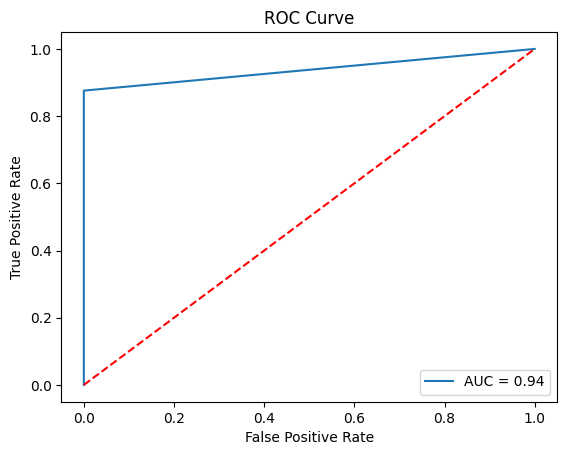

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

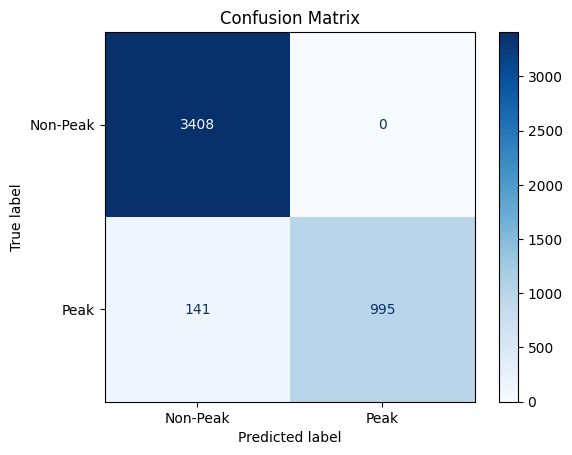

In [47]:
# Classification Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Peak', 'Peak'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [48]:
y_test.shape

(4544,)

In [75]:
#Use independently trained model 10 times as an ensemble
from sklearn.metrics import accuracy_score

def train_and_evaluate_model(model_func, X_train, y_train, X_val, y_val, X_test, y_test, epochs=3):
    # Create and compile the model
    model = model_func()
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    # Predict on test data
    y_pred = model.predict(X_test)
    return y_pred

# Number of models in the ensemble
num_models = 10

# Store predictions from each model
ensemble_predictions = []

for i in range(num_models):
    print(f"Training model {i+1}/{num_models}")
    y_pred = train_and_evaluate_model(create_CNN, X_train, y_train, X_val, y_val, X_test, y_test, epochs=15)
    ensemble_predictions.append(y_pred)

# Average the predictions
average_predictions = np.mean(ensemble_predictions, axis=0)

# Convert averaged predictions to binary output
average_predictions_binary = (average_predictions >= 0.5).astype(int)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, average_predictions_binary)
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
